In [1]:
from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
coco = COCO('/home/centos/rabeea/maski/dataset and code/train-val/annotations/instances_train2018.json')
img_dir = "/home/centos/rabeea/maski/dataset and code/train-val/train2018/"
image_id = 25

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


In [3]:
img = coco.imgs[image_id]
# print(coco.imgs[image_id]['file_name']=='cate3-00006.jpg')
img

{'license': 1,
 'flickr_url': '',
 'coco_url': '',
 'width': 1991,
 'date_captured': '2018-05-29 18:12:32.866718',
 'id': 25,
 'height': 1127,
 'file_name': 'cate3-00044.jpg'}

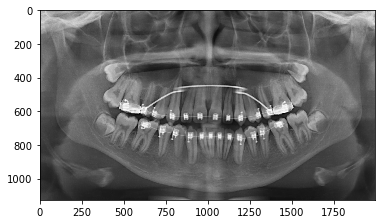

In [4]:
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')
plt.show()

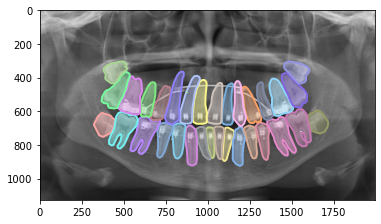

In [5]:
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
# print(anns)
coco.showAnns(anns)

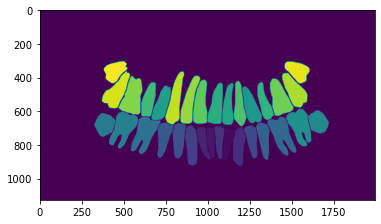

In [15]:
mask = coco.annToMask(anns[0])
j=1
for i in range(len(anns)):
#     print(j, np.unique(coco.annToMask(anns[i])),len(np.unique((j)* coco.annToMask(anns[i]))))
    mask= np.where (mask!=0, mask, (j)* coco.annToMask(anns[i]))
    if len(np.unique((j)* coco.annToMask(anns[i])))>1:
        j=j+1
plt.imshow(mask)

In [16]:
np.unique(mask)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=uint8)

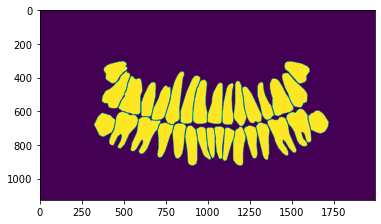

In [20]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
# for i in range(33):
    if i>0:
        mask += coco.annToMask(anns[i])

plt.imshow(mask)

In [21]:
np.unique(mask)

array([0, 1], dtype=uint8)